<a href="https://colab.research.google.com/github/SardarAmmer/DataScience-Projects-/blob/main/DEN_Task_3_(Email_Spam_Detection%7C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Exploring Dataset
import pandas as pd
df=pd.read_csv('/content/spam.csv')
print('Checking any null values\n')
print(df.isnull().sum())
print("\nData Details")
print(df.describe())




Checking any null values

Category    0
Message     0
dtype: int64

Data Details
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


In [ ]:
# @title Cleaning the Dataset
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Resources
nltk.download('stopwords',force=True)
nltk.download('punkt',force=True)

#Reading dataset
df=pd.read_csv('/content/spam.csv')
df.drop_duplicates(inplace=True)

df.columns = ['category', 'message']
#Binanry
df['category'] = df['category'].map({'ham': 0, 'spam': 1})

# preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Cleaining and preprocessing
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Basic tokenization using split
    words = text.split()
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply preprocessing
df['cleaned_message'] = df['message'].apply(preprocess_text)

# View the result
print(df.head())






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   category                                            message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


In [ ]:
# @title Victorization
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert cleaned text to numerical feature matrix
X = tfidf_vectorizer.fit_transform(df['cleaned_message'])

# Labels (target variable)
y = df['category']

# Shape of the result
print("TF-IDF vectorized data shape:", X.shape)


TF-IDF vectorized data shape: (5157, 6296)


In [ ]:
# @title Model building (Using all three for performance purposes)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# 3. Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Print Results
print("Accuracy Scores:")
print(f"Multinomial Naive Bayes: {acc_nb:.4f}")
print(f"Logistic Regression:     {acc_lr:.4f}")
print(f"Support Vector Machine:  {acc_svm:.4f}")




Accuracy Scores:
Multinomial Naive Bayes: 0.9700
Logistic Regression:     0.9632
Support Vector Machine:  0.9816


In [ ]:
# @title Evaluation Matrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create dictionary to store results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Define models and predictions
model_names = ["Naive Bayes", "Logistic Regression", "SVM"]
predictions = [y_pred_nb, y_pred_lr, y_pred_svm]

# Calculate metrics for each model
for name, y_pred in zip(model_names, predictions):
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["F1-Score"].append(f1_score(y_test, y_pred))

# Convert to DataFrame for nice display
results_df = pd.DataFrame(results)

# Round for readability
results_df = results_df.round(4)

# Display the table
print("📋 Model Performance Summary:")
display(results_df)



📋 Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.9700,1.0000,0.7721,0.8714
1,Logistic Regression,0.9632,0.9712,0.7426,0.8417
2,SVM,0.9816,0.9756,0.8824,0.9266


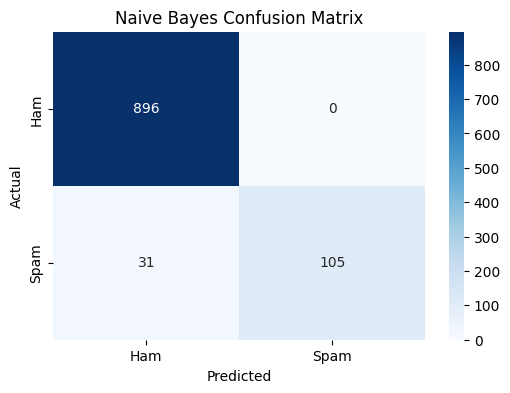

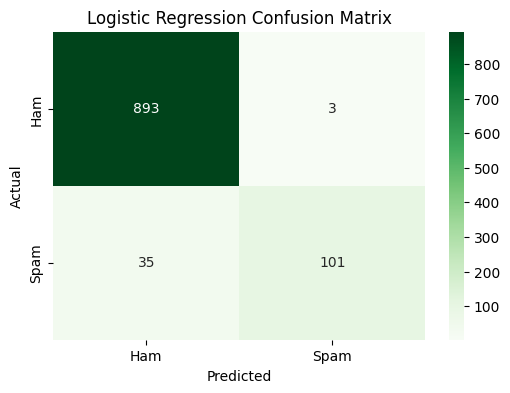

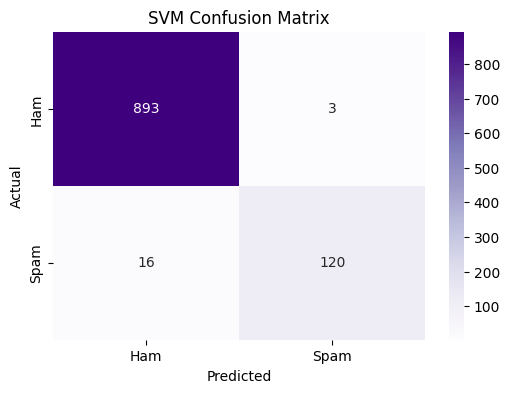

In [ ]:
# @title Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Confusion matrices
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Naive Bayes Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Logistic Regression Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot SVM Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# @title Teting the Models
# Sample test messages
test_messages = [
    "Win a brand new car by clicking this link!",
    "Meeting rescheduled to 3 PM tomorrow.",
    "Exclusive deal for you! Buy now and save 50%.",
]

# Preprocess and vectorize
processed = [' '.join([stemmer.stem(word) for word in re.sub(r'[^\w\s]', '', msg.lower()).split() if word not in stop_words]) for msg in test_messages]

X_test = tfidf_vectorizer.transform(processed)

# Models dictionary
models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model,
    "SVM": svm_model
}

# Make predictions and display output
for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name} Predictions:")
    for msg, pred in zip(test_messages, preds):
        print(f"→ '{msg}' ➜ {'Spam' if pred == 1 else 'Ham'}")



Naive Bayes Predictions:
→ 'Win a brand new car by clicking this link!' ➜ Ham
→ 'Meeting rescheduled to 3 PM tomorrow.' ➜ Ham
→ 'Exclusive deal for you! Buy now and save 50%.' ➜ Ham

Logistic Regression Predictions:
→ 'Win a brand new car by clicking this link!' ➜ Ham
→ 'Meeting rescheduled to 3 PM tomorrow.' ➜ Ham
→ 'Exclusive deal for you! Buy now and save 50%.' ➜ Ham

SVM Predictions:
→ 'Win a brand new car by clicking this link!' ➜ Spam
→ 'Meeting rescheduled to 3 PM tomorrow.' ➜ Ham
→ 'Exclusive deal for you! Buy now and save 50%.' ➜ Ham
